## Visualizations in Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
def analyzer(max_depth):
    data=pd.read_csv('Social_Network_Ads.csv')
    X = data.iloc[:,2:4].values
    y = data.iloc[:,-1].values

    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X,y)
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1,step=0.1)
    b=np.arange(start=X[:1].min()-1, stop=X[:-1].max()+1, step=100)

    # Forming a meshgrid and sending Each Classifier Point into Meshgrid
    # It will either give Yes/No
    XX,YY = np.meshgrid(a,b)
    input_array=np.array([XX.ravel(),YY.ravel()]).T
    labels=clf.predict(input_array)
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)





# Clear Cut Case of Overfitting

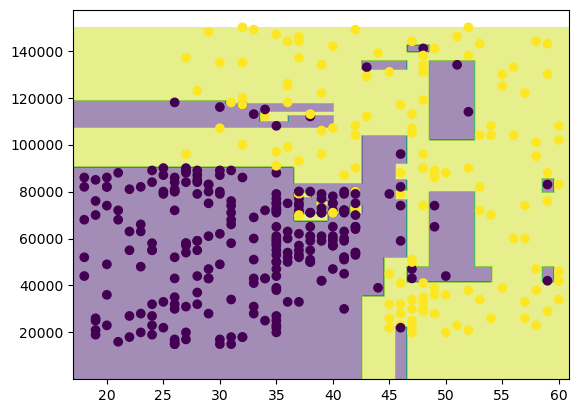

In [3]:
analyzer(max_depth=None)


# Underfitting

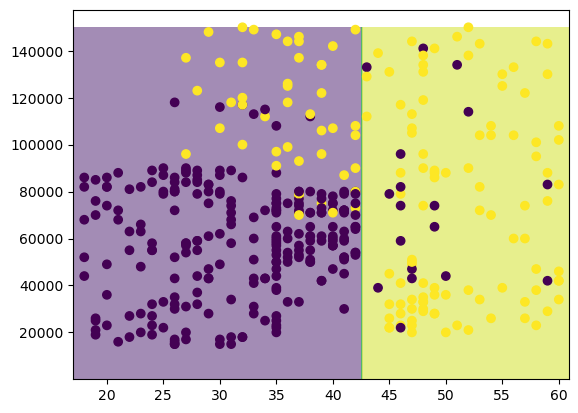

In [4]:
analyzer(max_depth=1)


# Lets Try other Depths as well like 4,5,6

## Looks Like Optimum

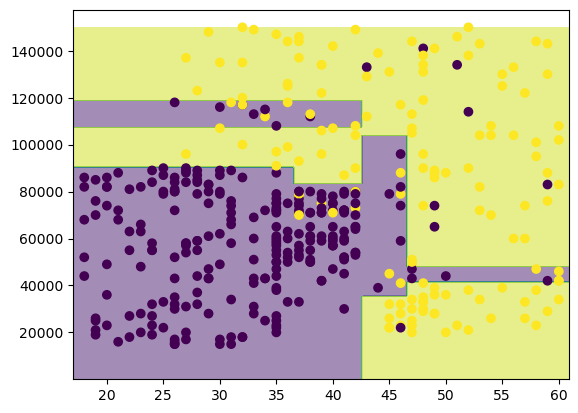

In [5]:
analyzer(max_depth=4)

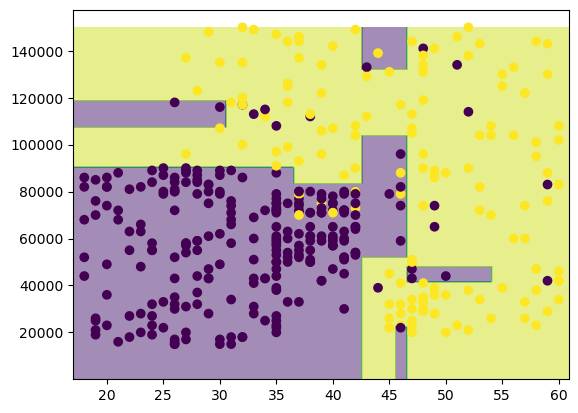

In [6]:
analyzer(max_depth=5) 
# Again Overfitting

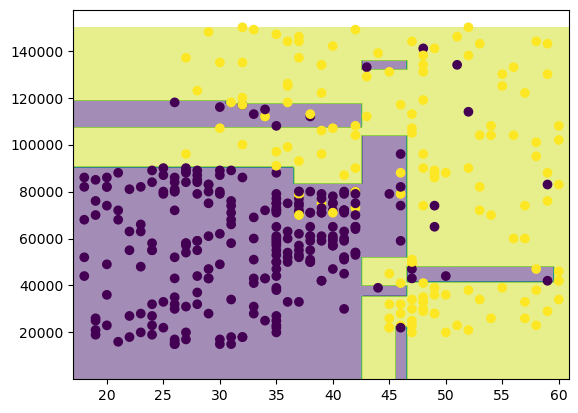

In [7]:
analyzer(max_depth=6)

# Using dtreeviz for Advanced Visualisations for Decision Trees

# Why dtreeviz?

## When ploting Decision Trees using scikit Learn we get Graphs like Below which includes some Information that makes understanding Worse and some Information is Extra not Required As such 

## Like in Below Graph we see columns Indexes on Which Splititng is occuring, so when there will be a large dataset it will be difficult to remember Names of those all Columns.
## Ultimately making Interpretation Difficult!

In [8]:
import graphviz.backend as be

In [9]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [10]:
clas = tree.DecisionTreeClassifier(max_depth=2)
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

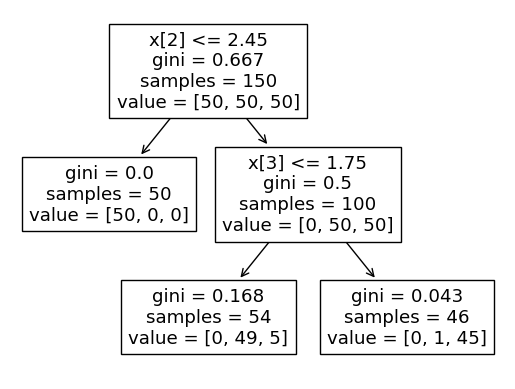

In [11]:
from sklearn.tree import plot_tree
plot_tree(clas)

## So to solve these problems we can use dtreeviz

In [12]:
!pip install dtreeviz

# Classification

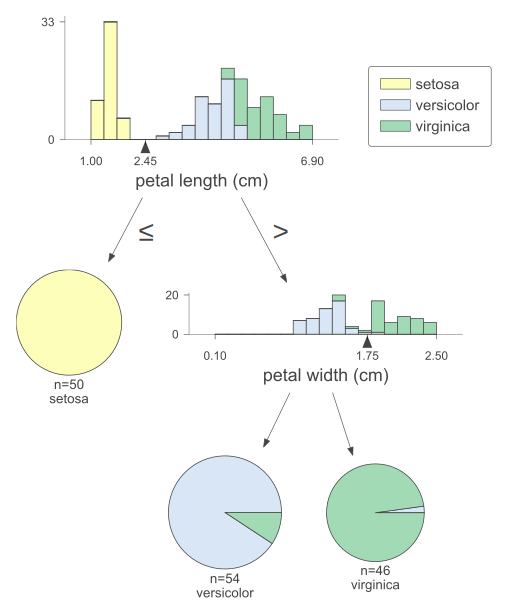

In [13]:
from dtreeviz import model as dtreeviz_model

viz = dtreeviz_model(clas,
              X_train,
              y_train,
              feature_names=iris.feature_names,
              class_names=['setosa','versicolor','virginica']
            )
viz.view(scale=2)

In [14]:
clas = tree.DecisionTreeClassifier(max_depth=None)
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train,y_train)

DecisionTreeClassifier()

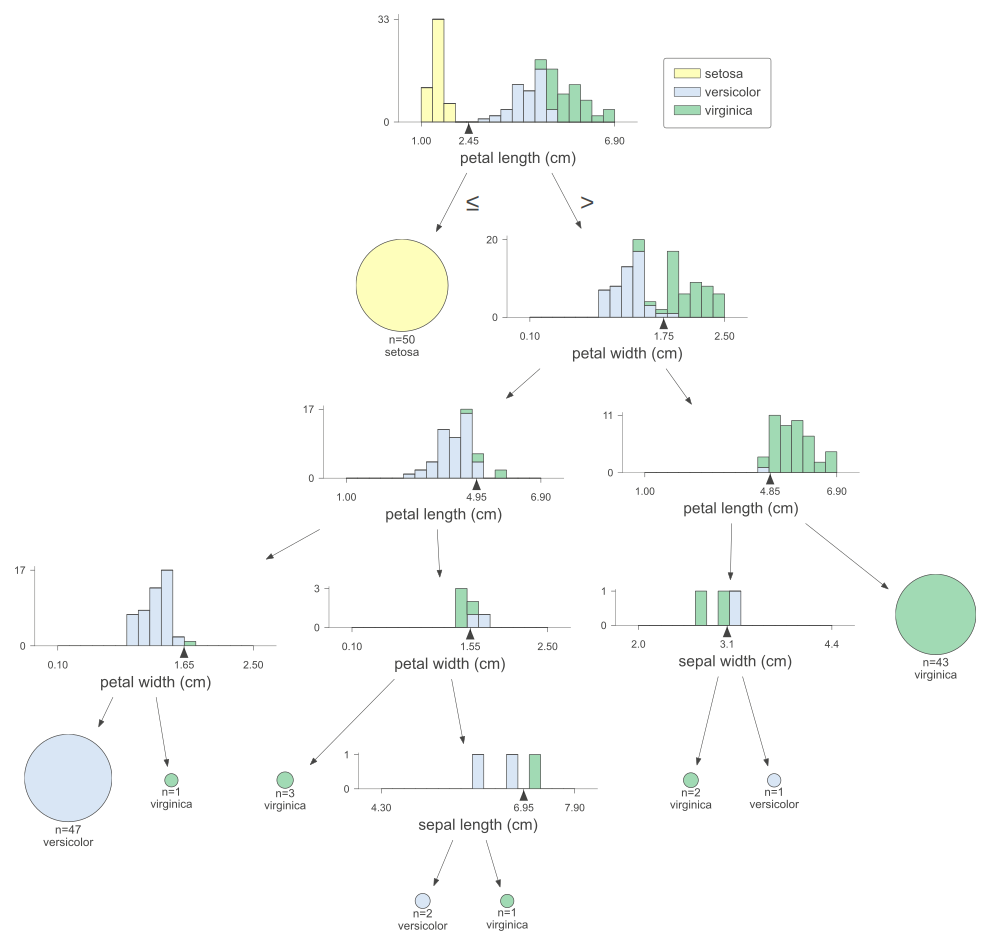

In [28]:
viz = dtreeviz_model(clas,
              X_train,
              y_train,
              feature_names=iris.feature_names,
              class_names=['setosa','versicolor','virginica']
            )
viz.view(scale=1.75)

# Regression

In [16]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Load the Boston dataset
boston = fetch_openml(name="boston", version=1, as_frame=True,parser='auto')

# Convert to a DataFrame (optional, since `fetch_openml` already returns a DataFrame when as_frame=True)
boston_df = pd.DataFrame(boston.data)
boston['target'] = boston.target
boston_df['target'] = boston.target  # Add target to DataFrame

# Display the first few rows of the DataFrame
print(boston_df.head())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  target  
0  396.90   4.98    24.0  
1  396.90   9.14    21.6  
2  392.83   4.03    34.7  
3  394.63   2.94    33.4  
4  396.90   5.33    36.2  


C:\Users\rashi\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


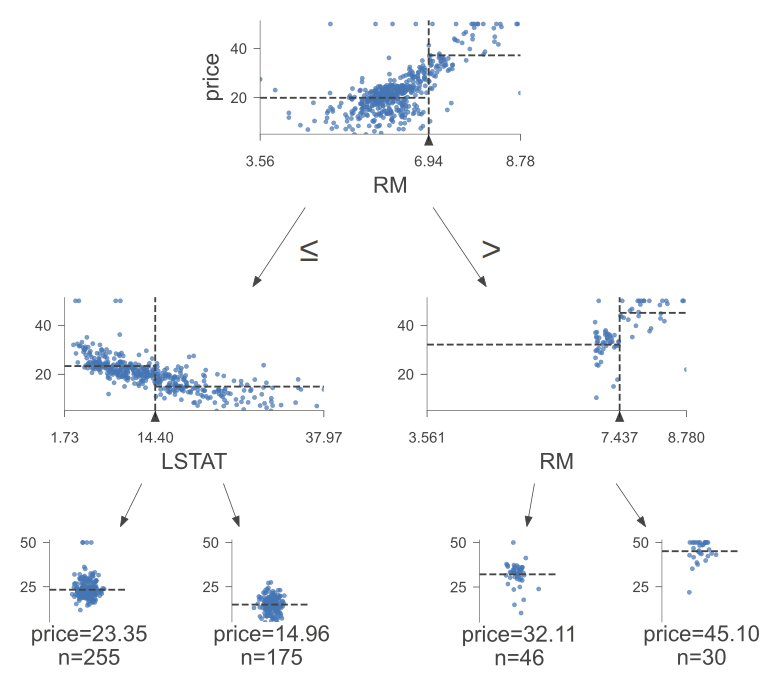

In [17]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeRegressor
from dtreeviz import model as dtreeviz_model
# Load the Boston dataset
# load_boston is no longer in sklearn datasets so:
boston = fetch_openml(name="boston", version=1, as_frame=True,parser='auto')

# Create the feature DataFrame and the target Series
X_train =boston.data # Ensure columns are correctly named
y_train = boston.target  # Naming the target variable

# Fit the Decision Tree Regressor
regr = DecisionTreeRegressor(max_depth=2)

# Fit the model
regr.fit(X_train, y_train)

viz = dtreeviz_model(regr,
                X_train,
                y_train,
                target_name='price',
                feature_names=X_train.columns.tolist(),  
                )
viz.view(scale=2.5)



# Horizontal Decision Tree

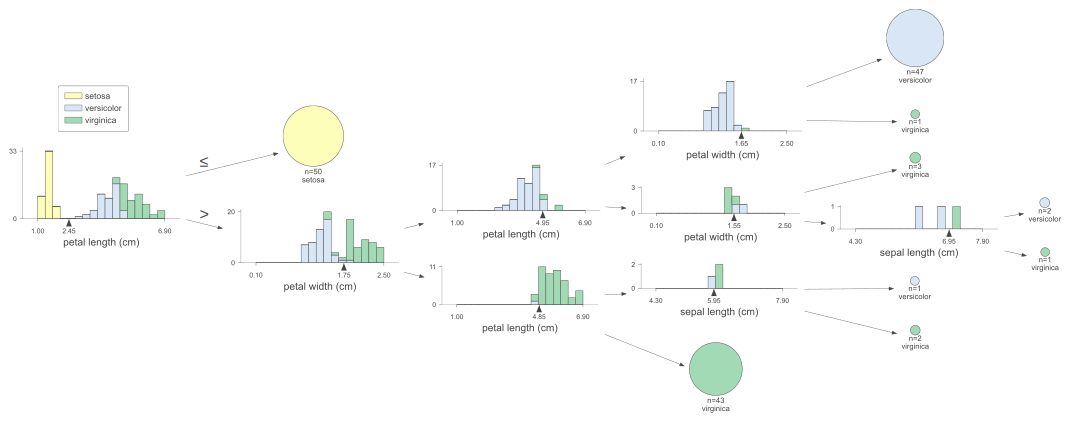

In [30]:
from dtreeviz import model as dtreeviz_model

clas = tree.DecisionTreeClassifier(max_depth=None)
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train,y_train)

viz = dtreeviz_model(clas,
              X_train,
              y_train,
              feature_names=iris.feature_names,
              class_names=['setosa','versicolor','virginica']
            )
viz.view(scale=1.15,orientation='LR')

# Show Prediction Path

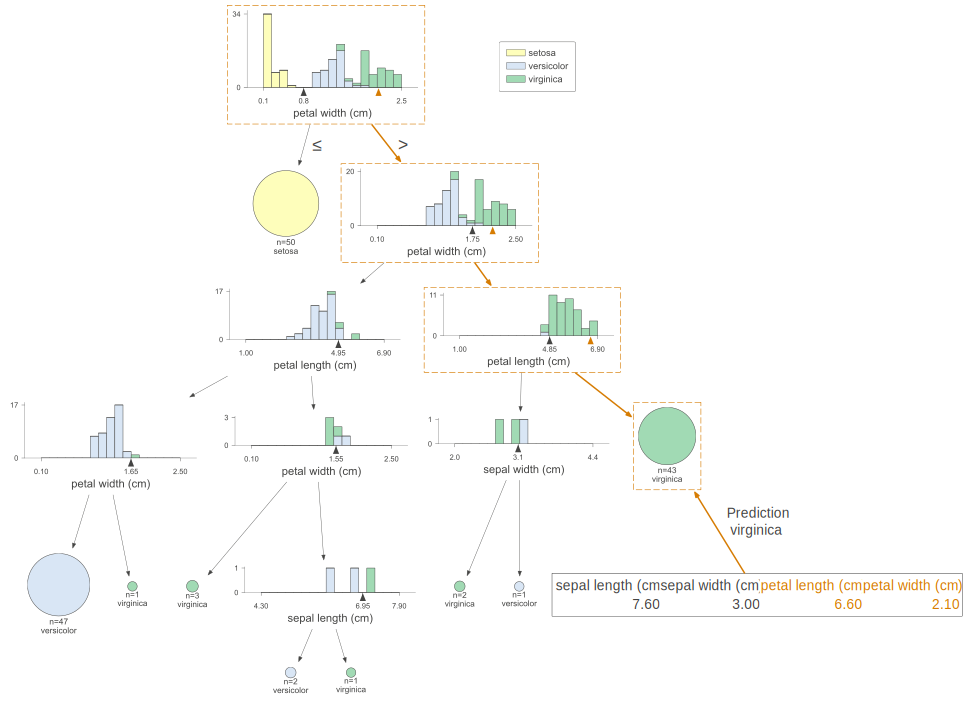

In [31]:
from dtreeviz import model as dtreeviz_model

clas = tree.DecisionTreeClassifier(max_depth=None)
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train,y_train)

X = iris.data[np.random.randint(0,len(iris.data)),:]
viz = dtreeviz_model(clas,
              X_train,
              y_train,
              feature_names=iris.feature_names,
              class_names=['setosa','versicolor','virginica']
                    
            )
viz.view(scale=1.25, x=X)

# Show Node Numbers

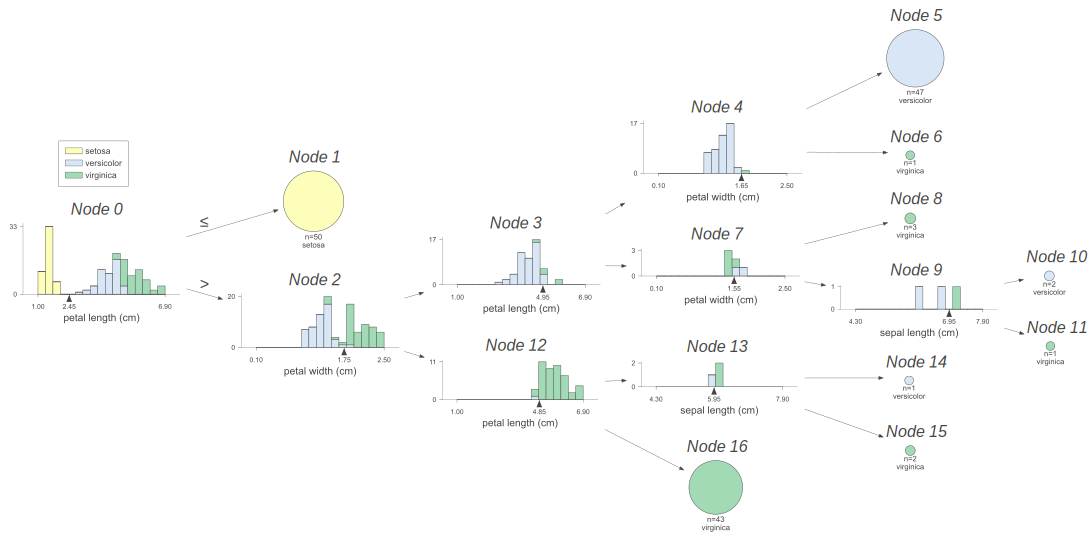

In [32]:
from dtreeviz import model as dtreeviz_model

clas = tree.DecisionTreeClassifier(max_depth=None)
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train,y_train)

X = iris.data[np.random.randint(0,len(iris.data)),:]
viz = dtreeviz_model(clas,
              X_train,
              y_train,
              feature_names=iris.feature_names,
              class_names=['setosa','versicolor','virginica']
                    
            )
viz.view(scale=1.15, orientation='LR',show_node_labels=True)

# Without Any Graphs(histograms,scatterplots etc...)

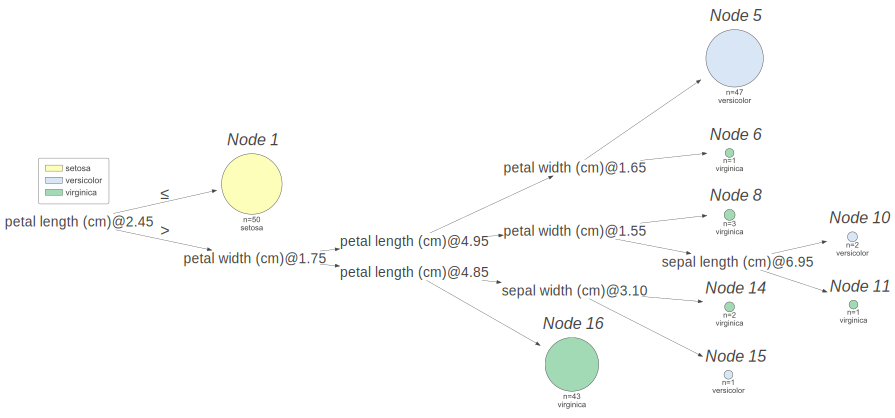

In [33]:
from dtreeviz import model as dtreeviz_model

clas = tree.DecisionTreeClassifier(max_depth=None)
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train,y_train)

X = iris.data[np.random.randint(0,len(iris.data)),:]
viz = dtreeviz_model(clas,
              X_train,
              y_train,
              feature_names=iris.feature_names,
              class_names=['setosa','versicolor','virginica']
                    
            )
viz.view(scale=1.15, orientation='LR',show_node_labels=True,fancy=False)

# To only See Prediction Path

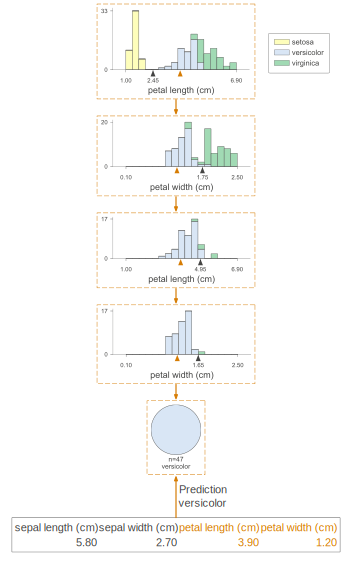

In [36]:
viz = dtreeviz_model(clas,
              X_train,
              y_train,
              feature_names=iris.feature_names,
              class_names=['setosa','versicolor','virginica']
                    
            )
viz.view(show_just_path=True,x=X,scale=1)

# Prediction Path in Plain Engish

In [23]:

print(viz.explain_prediction_path(X))

4.85 <= petal length (cm) 
1.75 <= petal width (cm) 



# Feature Importance

None


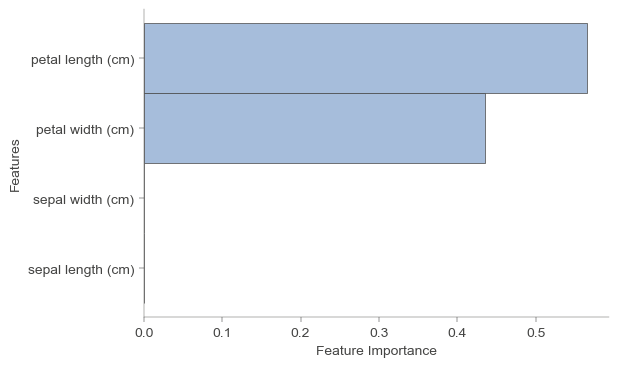

In [24]:

print(viz.instance_feature_importance(X, figsize=(6,4)))

# Univariate Regression

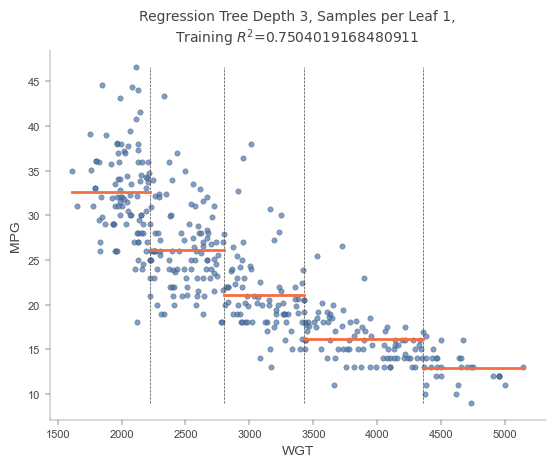

In [25]:
dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/cars.csv"
df_cars = pd.read_csv(dataset_url)
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']
features = list(X.columns)


dtr_cars = DecisionTreeRegressor(max_depth=3, criterion="absolute_error")
dtr_cars.fit(X.values, y.values)

viz_rmodel = dtreeviz_model(dtr_cars, X, y,
                            feature_names=features,
                            target_name='MPG')

viz_rmodel.rtree_feature_space(features=['WGT'])

# In order to visualize two-dimensional feature space, we can draw in three dimensions

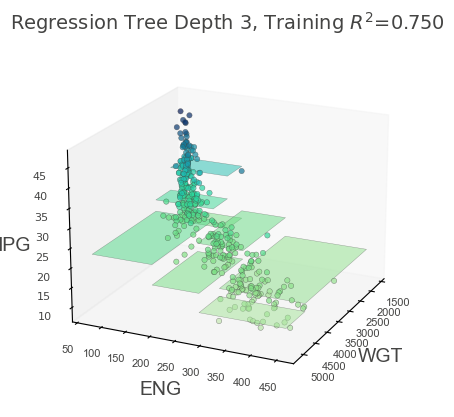

In [26]:

viz_rmodel.rtree_feature_space3D(features=['WGT','ENG'],
                                 fontsize=14,
                                 elev=20, azim=25,
                                 dist=8.2,
                                 show={'splits', 'title'},
                                 colors={'tessellation_alpha': .5})

##  Heat map as if we were looking at the three-dimensional plot from the top down:

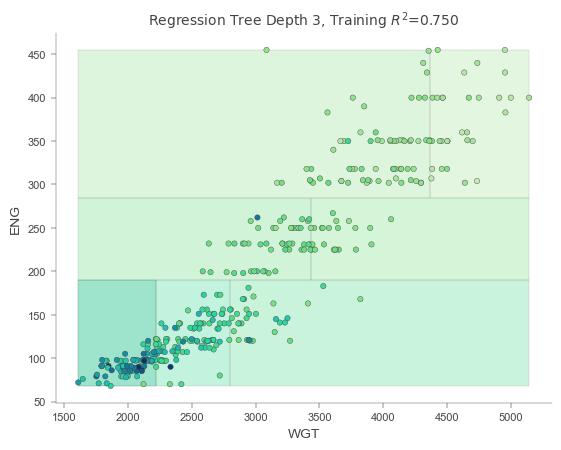

In [27]:

viz_rmodel.rtree_feature_space(features=['WGT','ENG'])